In [129]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [130]:
file_path = 'Pumpkin_Seeds_Dataset.xlsx'  
#We need to open our data set with the read_excel function.

try:
    df = pd.read_excel(file_path)
    print("The file was read successfully.")
except FileNotFoundError:
    print(f"Hata: '{dosya_yolu}' The file named could not be found.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

The file was read successfully.


In [131]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [132]:
df.shape

(2500, 13)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [134]:
#Let's look at the unique values ​​for our Class column.
unique_Class = df['Class'].unique()
print(unique_Class)

['Çerçevelik' 'Ürgüp Sivrisi']


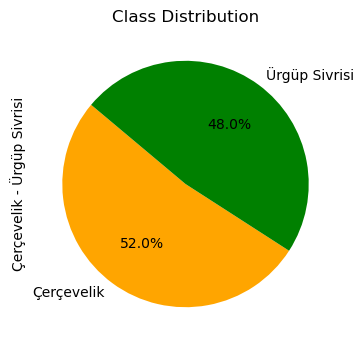

In [135]:
#Count the number of tags
label_counts = df['Class'].value_counts()
color = ['orange', 'green'] 

# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=color)
plt.title('Class Distribution')
plt.ylabel('Çerçevelik - Ürgüp Sivrisi')
plt.show()

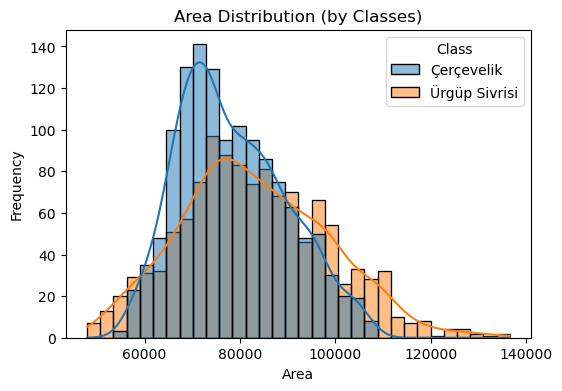

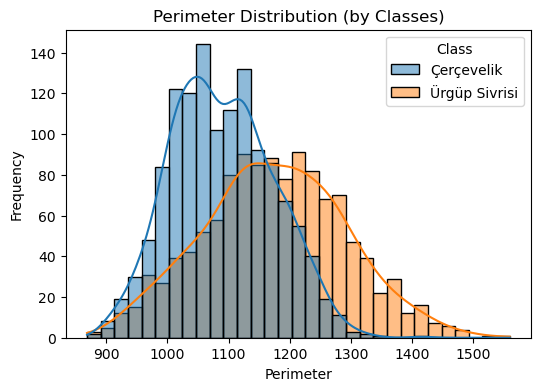

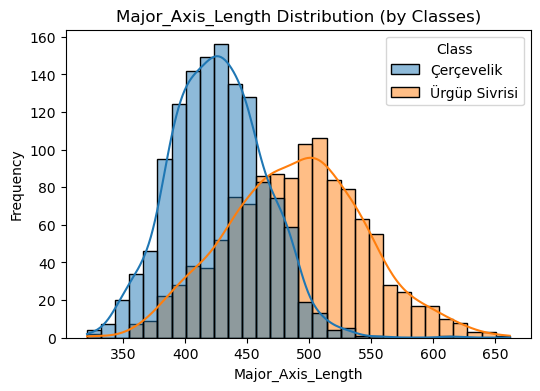

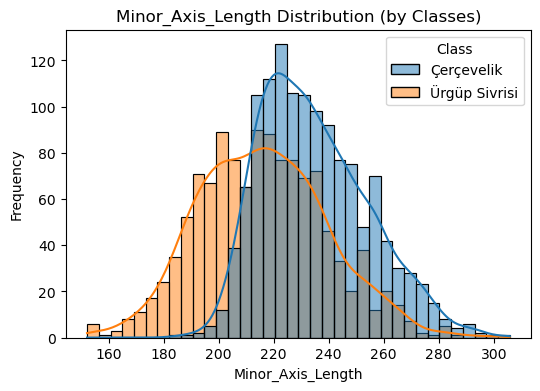

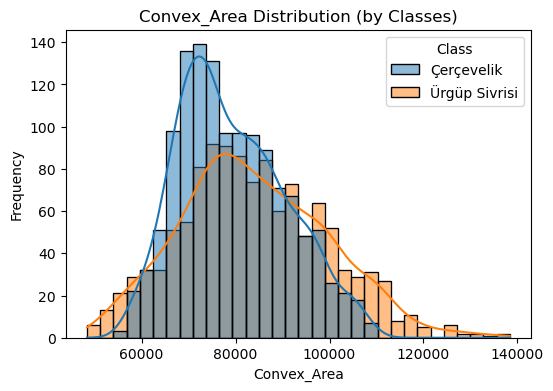

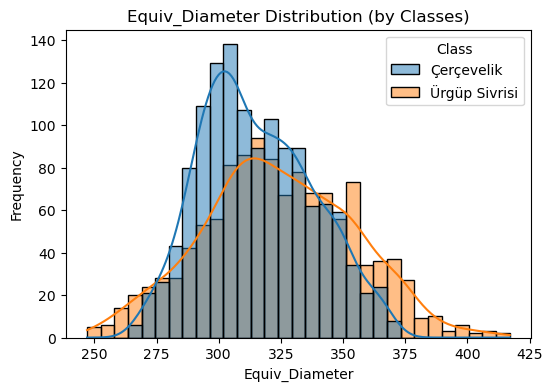

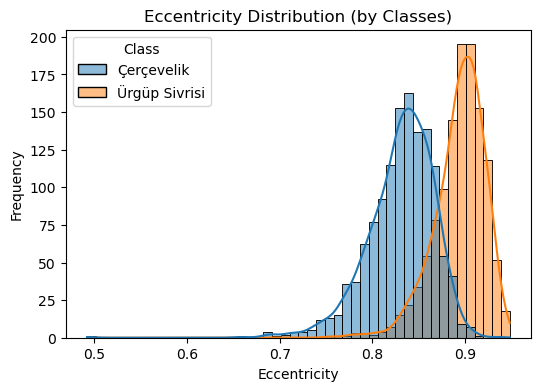

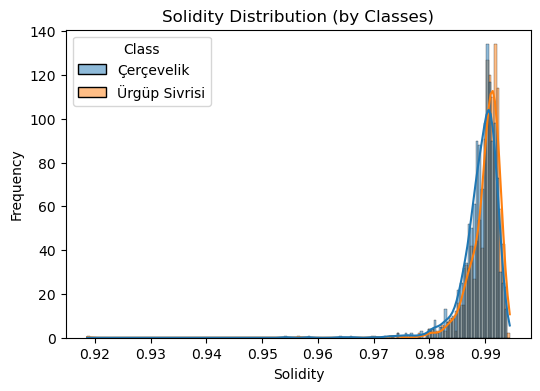

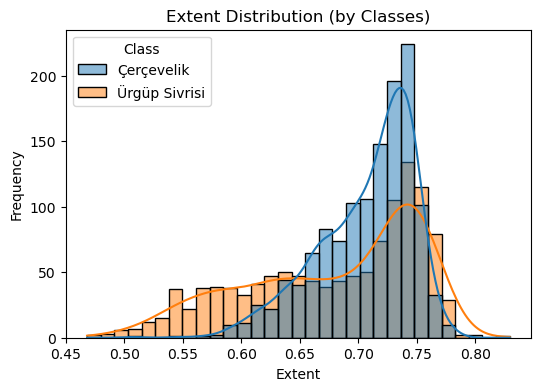

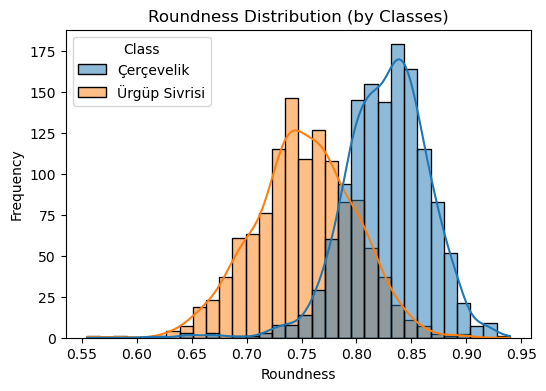

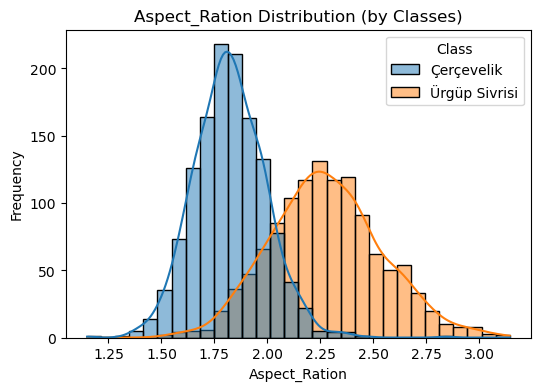

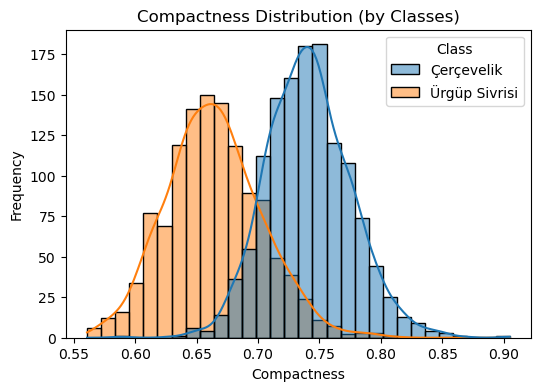

In [136]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Class', kde=True)
    plt.title(f'{col} Distribution (by Classes)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [137]:
X = df.drop(columns=['Class'])
y = df['Class']

In [138]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [139]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
linear_svm = LinearSVC(random_state=42, dual= True,  max_iter=100000) 
linear_svm.fit(X_train_scaled, y_train)
#We create and train our model.

# We make predictions on the test set.
y_pred_linear = linear_svm.predict(X_test_scaled)

# Let's evaluate the performance
print("Linear SVM (LinearSVC) Performance:")
print(classification_report(y_test, y_pred_linear))

Linear SVM (LinearSVC) Performance:
               precision    recall  f1-score   support

   Çerçevelik       0.83      0.90      0.87       251
Ürgüp Sivrisi       0.89      0.82      0.85       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



In [141]:
#Non-linear SVM
#Radial Basis Function (RBF) Kernel.
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto']}

#We create the GridSearchCV object.
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42),
                           param_grid,
                           cv=5, 
                           scoring='accuracy',  
                           n_jobs=-1)  

# We run GridSearchCV on the training data.
grid_search.fit(X_train_scaled, y_train)

# We obtain the best hyperparameters and the best score.
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best accuracy score: {best_score}")

# En iyi modelle test kümesi üzerinde tahmin yapın
best_rbf_svm = grid_search.best_estimator_
y_pred_best_rbf = best_rbf_svm.predict(X_test_scaled)
print("\nBest RBF SVM Performance (Test Set):")
print(classification_report(y_test, y_pred_best_rbf))

Best hyperparameters: {'C': 10, 'gamma': 0.1}
Best accuracy score: 0.891

Best RBF SVM Performance (Test Set):
               precision    recall  f1-score   support

   Çerçevelik       0.85      0.88      0.87       251
Ürgüp Sivrisi       0.88      0.84      0.86       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



In [142]:
#Polynomial Kernel
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5], 
    'coef0': [-1, 0, 1]      # Independent term in the kernel
}
grid_search_poly = GridSearchCV(SVC(kernel='poly', random_state=42),
                               param_grid_poly,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_poly.fit(X_train_scaled, y_train)
best_params_poly = grid_search_poly.best_params_
best_score_poly = grid_search_poly.best_score_
print(f"\nBest Hyperparameters for Polynomial Kernel: {best_params_poly}")
print(f"Best Accuracy Score for Polynomial Kernel (Cross Validation): {best_score_poly}")


best_poly_svm = grid_search_poly.best_estimator_
y_pred_best_poly = best_poly_svm.predict(X_test_scaled)
print("\nBest Polynomial Kernel SVM Performance (Test Set):")
print(classification_report(y_test, y_pred_best_poly))


Best Hyperparameters for Polynomial Kernel: {'C': 10, 'coef0': 1, 'degree': 3}
Best Accuracy Score for Polynomial Kernel (Cross Validation): 0.893

Best Polynomial Kernel SVM Performance (Test Set):
               precision    recall  f1-score   support

   Çerçevelik       0.85      0.90      0.87       251
Ürgüp Sivrisi       0.90      0.84      0.86       249

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



In [143]:
#Linear Kernel
linear_kernel_svm = SVC(kernel='linear', random_state=42)
linear_kernel_svm.fit(X_train_scaled, y_train)
y_pred_linear_kernel = linear_kernel_svm.predict(X_test_scaled)
print("\nLinear SVM (SVC - Linear Kernel) Performance:")
print(classification_report(y_test, y_pred_linear_kernel))


Linear SVM (SVC - Linear Kernel) Performance:
               precision    recall  f1-score   support

   Çerçevelik       0.83      0.90      0.86       251
Ürgüp Sivrisi       0.89      0.81      0.85       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



In [149]:
#K-Nearest Neighbors - KNN

param_grid_knn = {'n_neighbors': list(range(1, 21))}  # Number of neighbors to try

grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn,
                               cv=5,  
                               scoring='accuracy',
                               n_jobs=-1)

grid_search_knn.fit(X_train_scaled, y_train)

best_k = grid_search_knn.best_params_['n_neighbors']
best_score_knn = grid_search_knn.best_score_

print(f"\nBest K Value (n_neighbors): {best_k}")
print(f"Best Accuracy Score (Cross Validation): {best_score_knn}")


best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_scaled, y_train)
y_pred_best_knn = best_knn_model.predict(X_test_scaled)

print("\nBest KNN Model Performance (Test Set):")
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred_best_knn)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_knn))


Best K Value (n_neighbors): 11
Best Accuracy Score (Cross Validation): 0.8885

Best KNN Model Performance (Test Set):
Doğruluk (Accuracy): 0.86

Classification Report:
               precision    recall  f1-score   support

   Çerçevelik       0.84      0.90      0.87       251
Ürgüp Sivrisi       0.89      0.82      0.85       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500

